In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from matplotlib import pyplot as plt
from mlxtend.frequent_patterns import apriori
import numpy as np
from mlxtend.frequent_patterns import association_rules
import seaborn as sns
from sklearn.model_selection import learning_curve
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers.legacy import Adam
from keras.optimizers.legacy import SGD
from keras.optimizers.legacy import RMSprop

C:\Python 3.11\Lib\site-packages\tensorflow\python\framework\dtypes.py:35: DeprecationWarning: ml_dtypes.float8_e4m3b11 is deprecated. Use ml_dtypes.float8_e4m3b11fnuz
  from tensorflow.tsl.python.lib.core import pywrap_ml_dtypes


In [2]:
df = pd.read_csv('smoke_detection_iot.csv')


X = df[['Temperature[C]', 'Humidity[%]', 'TVOC[ppb]',
                     'eCO2[ppm]', 'Raw H2', 'Raw Ethanol', 'Pressure[hPa]',
                     'PM1.0', 'PM2.5', 'NC0.5', 'NC1.0', 'NC2.5']]
Y = df['Fire Alarm']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=292752)

In [3]:
pca = PCA(n_components=0.95)
pca.fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

In [4]:
clf_small_pca = DecisionTreeClassifier(max_depth=5)
clf_small_pca.fit(X_train_pca, y_train)
clf_small_pca_predictions = clf_small_pca.predict(X_test_pca)
accuracy_clf_small_pca = accuracy_score(y_test, clf_small_pca_predictions)
confusion_clf_small_pca = confusion_matrix(y_test, clf_small_pca_predictions)

In [8]:
print(f"Dokładność Decision Tree with PCA (small depth): {accuracy_clf_small_pca*100:.5f} %")
print("Confusion Matrix Decision Tree с PCA (small depth):")
print(confusion_clf_small_pca)
print('------------------------------------------')

Dokładność Decision Tree with PCA (small depth): 90.87764 %
Confusion Matrix Decision Tree с PCA (small depth):
[[ 5131   230]
 [ 1484 11944]]
------------------------------------------


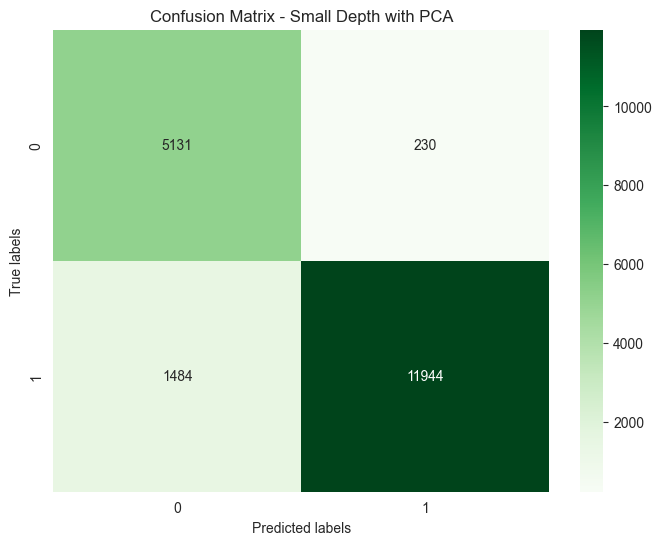

In [5]:
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_clf_small_pca, annot=True, cmap='Greens', fmt='g')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix - Small Depth with PCA')
plt.show()

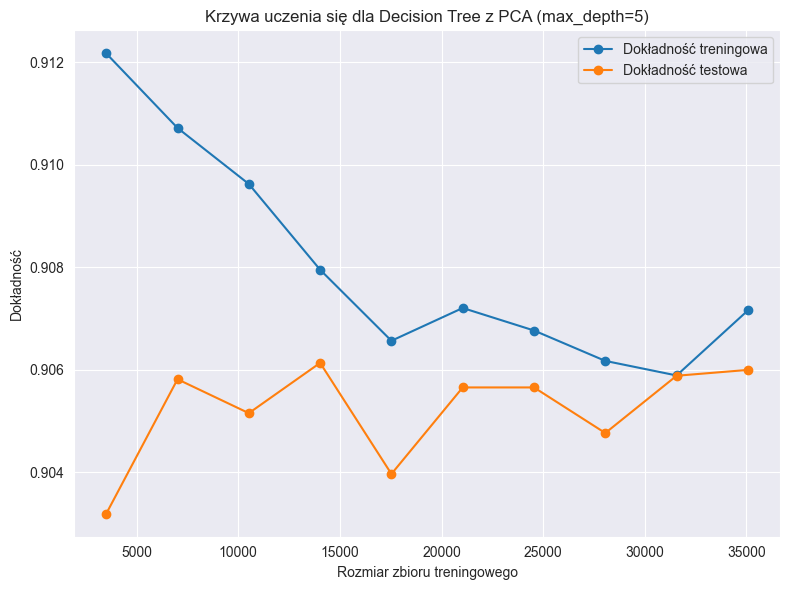

In [6]:
# Кривая обучения для модели с меньшей глубиной дерева
clf_small_pca = DecisionTreeClassifier(max_depth=5)

plt.figure(figsize=(8, 6))

train_sizes, train_scores, test_scores = learning_curve(clf_small_pca, X_train_pca, y_train, cv=5, train_sizes=np.linspace(0.1, 1.0, 10))
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

plt.plot(train_sizes, train_scores_mean, 'o-', label='Dokładność treningowa')
plt.plot(train_sizes, test_scores_mean, 'o-', label='Dokładność testowa')
plt.title('Krzywa uczenia się dla Decision Tree z PCA (max_depth=5)')
plt.xlabel('Rozmiar zbioru treningowego')
plt.ylabel('Dokładność')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

In [11]:
# Для модели с большей глубиной дерева
clf_large_pca = DecisionTreeClassifier(max_depth=None)
clf_large_pca.fit(X_train_pca, y_train)
clf_large_pca_predictions = clf_large_pca.predict(X_test_pca)
accuracy_clf_large_pca = accuracy_score(y_test, clf_large_pca_predictions)
confusion_clf_large_pca = confusion_matrix(y_test, clf_large_pca_predictions)

In [12]:
print(f"Dokładność Decision Tree z PCA (big depth): {accuracy_clf_large_pca*100:.5f} %")
print("Confusion Matrix Decision Tree z PCA (big depth):")
print(confusion_clf_large_pca)
print('------------------------------------------')

Dokładność Decision Tree z PCA (big depth): 97.62627 %
Confusion Matrix Decision Tree z PCA (big depth):
[[ 5139   222]
 [  224 13204]]
------------------------------------------


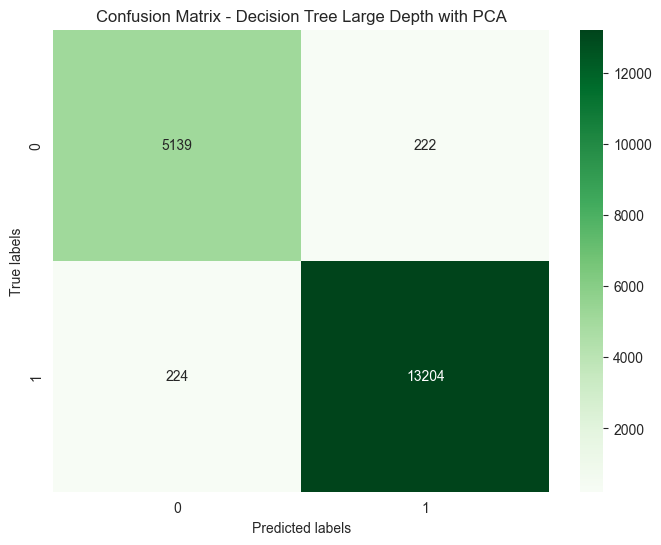

In [13]:
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_clf_large_pca, annot=True, cmap='Greens', fmt='g')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix - Decision Tree Large Depth with PCA')
plt.show()

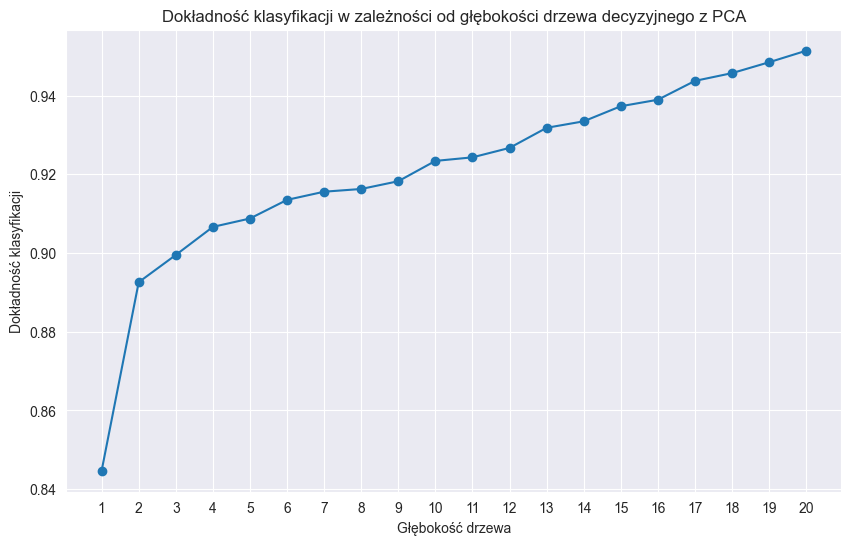

In [14]:
depths = []
accuracies = []
# Экспериментирование с разными глубинами дерева и вычисление точности
for depth in range(1, 21):  # Диапазон глубины от 1 до 20
    clf = DecisionTreeClassifier(max_depth=depth)
    clf.fit(X_train_pca, y_train)
    clf_predictions = clf.predict(X_test_pca)
    accuracy_clf = accuracy_score(y_test, clf_predictions)
    depths.append(depth)
    accuracies.append(accuracy_clf)

# Создание графика
plt.figure(figsize=(10, 6))
plt.plot(depths, accuracies, marker='o', linestyle='-')
plt.title('Dokładność klasyfikacji w zależności od głębokości drzewa decyzyjnego z PCA')
plt.xlabel('Głębokość drzewa')
plt.ylabel('Dokładność klasyfikacji')
plt.xticks(np.arange(1, 21, step=1))  # Установка шагов на оси X от 1 до 20
plt.grid(True)
plt.show()

In [15]:
nb_pca = GaussianNB()
nb_pca.fit(X_train_pca, y_train)
nb_predictions_pca = nb_pca.predict(X_test_pca)
accuracy_nb_pca = accuracy_score(y_test, nb_predictions_pca)
confusion_nb_pca = confusion_matrix(y_test, nb_predictions_pca)

In [16]:
print(f"Dokładność Naive Bayes с PCA: {accuracy_nb_pca*100:.5f} %")
print("Confusion Matrix Naive Bayes с PCA:")
print(confusion_nb_pca)
print('------------------------------------------')

Dokładność Naive Bayes с PCA: 74.39991 %
Confusion Matrix Naive Bayes с PCA:
[[  624  4737]
 [   73 13355]]
------------------------------------------


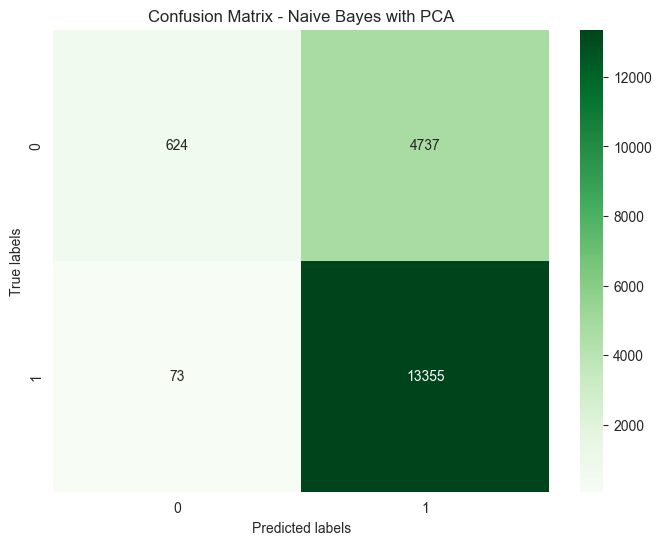

In [17]:
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_nb_pca, annot=True, cmap='Greens', fmt='g')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix - Naive Bayes with PCA')
plt.show()

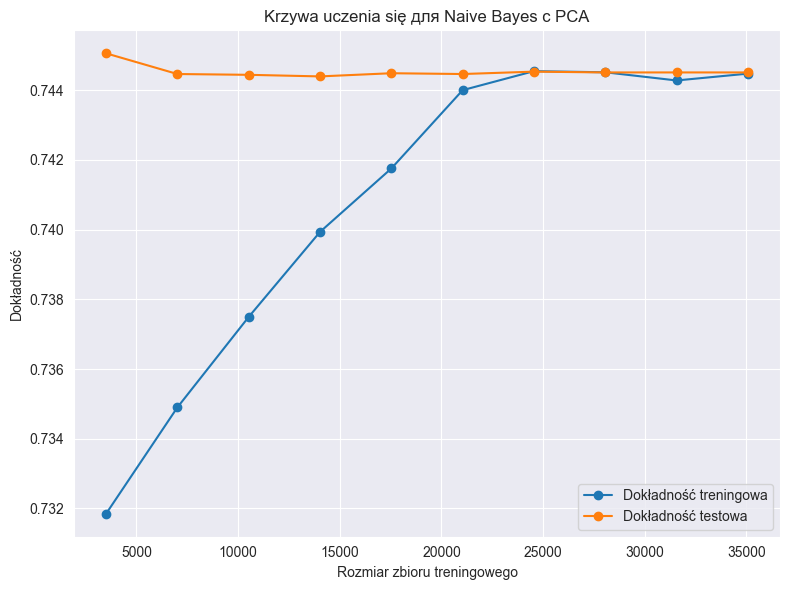

In [18]:
nb_pca = GaussianNB()

plt.figure(figsize=(8, 6))

train_sizes, train_scores, test_scores = learning_curve(nb_pca, X_train_pca, y_train, cv=5, train_sizes=np.linspace(0.1, 1.0, 10))
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

plt.plot(train_sizes, train_scores_mean, 'o-', label='Dokładność treningowa')
plt.plot(train_sizes, test_scores_mean, 'o-', label='Dokładność testowa')
plt.title('Krzywa uczenia się для Naive Bayes с PCA')
plt.xlabel('Rozmiar zbioru treningowego')
plt.ylabel('Dokładność')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

In [6]:
knn3_pca = KNeighborsClassifier(n_neighbors=3)
knn3_pca.fit(X_train_pca, y_train)
knn3_predictions_pca = knn3_pca.predict(X_test_pca)
accuracy_knn3_pca = accuracy_score(y_test, knn3_predictions_pca)
confusion_knn3_pca = confusion_matrix(y_test, knn3_predictions_pca)

In [20]:
print(f"Dokładność k-NN с PCA (k=3): {accuracy_knn3_pca*100:.5f} %")
print("Confusion Matrix k-NN с PCA (k=3):")
print(confusion_knn3_pca)
print('------------------------------------------')

Dokładność k-NN с PCA (k=3): 94.79483 %
Confusion Matrix k-NN с PCA (k=3):
[[ 4867   494]
 [  484 12944]]
------------------------------------------


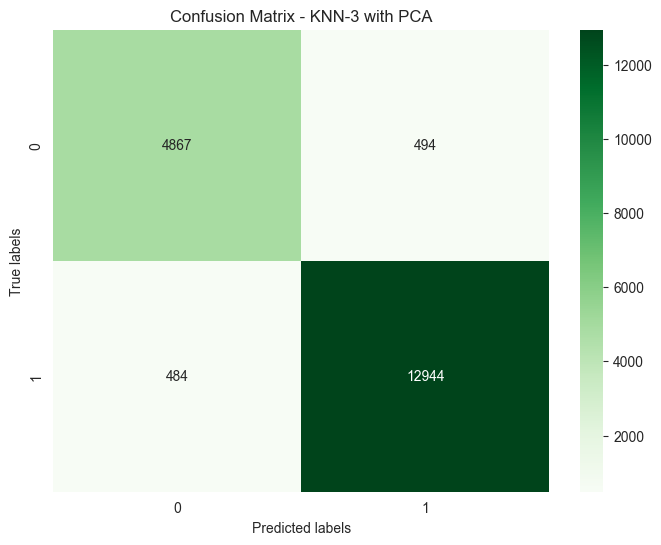

In [21]:
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_knn3_pca, annot=True, cmap='Greens', fmt='g')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix - KNN-3 with PCA')
plt.show()

In [7]:
knn5_pca = KNeighborsClassifier(n_neighbors=5)
knn5_pca.fit(X_train_pca, y_train)
knn5_predictions_pca = knn5_pca.predict(X_test_pca)
accuracy_knn5_pca = accuracy_score(y_test, knn5_predictions_pca)
confusion_knn5_pca = confusion_matrix(y_test, knn5_predictions_pca)

In [23]:
print(f"Dokładność k-NN с PCA (k=5): {accuracy_knn5_pca*100:.5f} %")
print("Confusion Matrix k-NN с PCA (k=5):")
print(confusion_knn5_pca)
print('------------------------------------------')

Dokładność k-NN с PCA (k=5): 95.59849 %
Confusion Matrix k-NN с PCA (k=5):
[[ 4951   410]
 [  417 13011]]
------------------------------------------


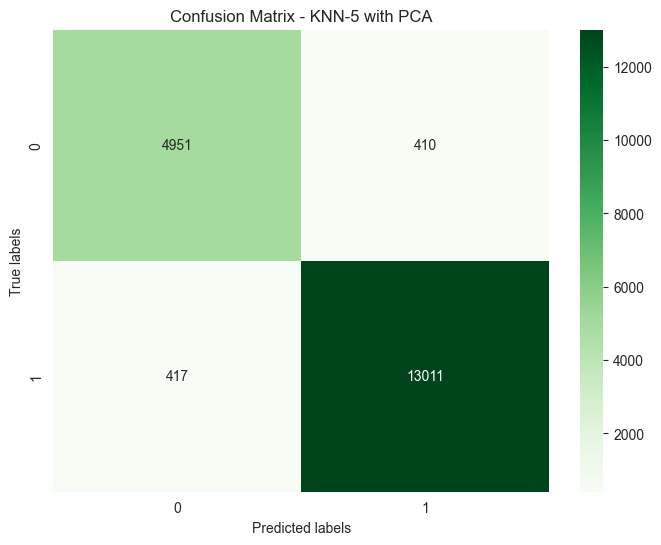

In [24]:
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_knn5_pca, annot=True, cmap='Greens', fmt='g')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix - KNN-5 with PCA')
plt.show()

In [8]:
knn11_pca = KNeighborsClassifier(n_neighbors=11)
knn11_pca.fit(X_train_pca, y_train)
knn11_predictions_pca = knn11_pca.predict(X_test_pca)
accuracy_knn11_pca = accuracy_score(y_test, knn11_predictions_pca)
confusion_knn11_pca = confusion_matrix(y_test, knn11_predictions_pca)

In [26]:
print(f"Dokładność k-NN с PCA (k=11): {accuracy_knn11_pca*100:.5f} %")
print("Confusion Matrix k-NN с PCA (k=11):")
print(confusion_knn11_pca)
print('------------------------------------------')

Dokładność k-NN с PCA (k=11): 94.74160 %
Confusion Matrix k-NN с PCA (k=11):
[[ 4846   515]
 [  473 12955]]
------------------------------------------


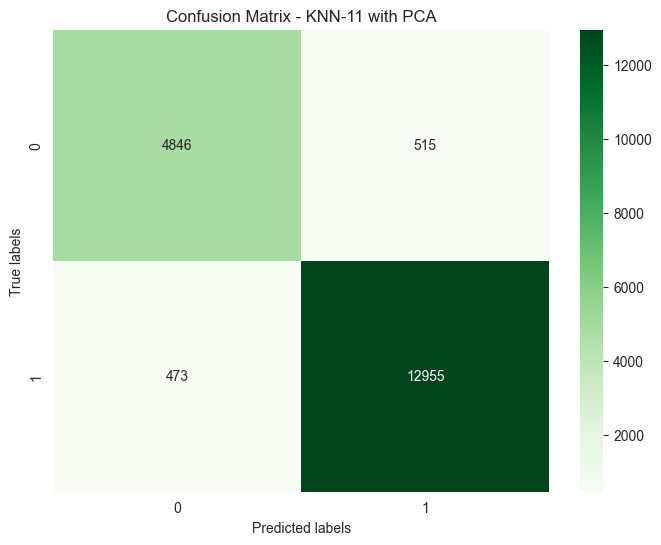

In [27]:
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_knn11_pca, annot=True, cmap='Greens', fmt='g')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix - KNN-11 with PCA')
plt.show()

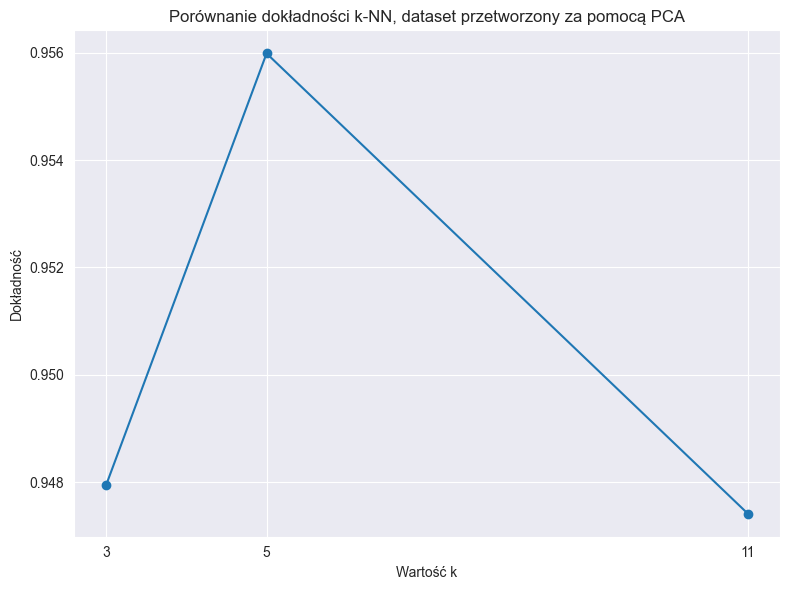

In [9]:
# Wartości dokładności dla różnych k
accuracies = [accuracy_knn3_pca, accuracy_knn5_pca, accuracy_knn11_pca]

# Wartości k
k_values = [3, 5, 11]

# Tworzenie wykresu
plt.figure(figsize=(8, 6))
plt.plot(k_values, accuracies, marker='o', linestyle='-')
plt.title('Porównanie dokładności k-NN, dataset przetworzony za pomocą PCA')
plt.xlabel('Wartość k')
plt.ylabel('Dokładność')
plt.xticks(k_values)
plt.grid(True)
plt.tight_layout()

# Wyświetlenie wykresu
plt.show()

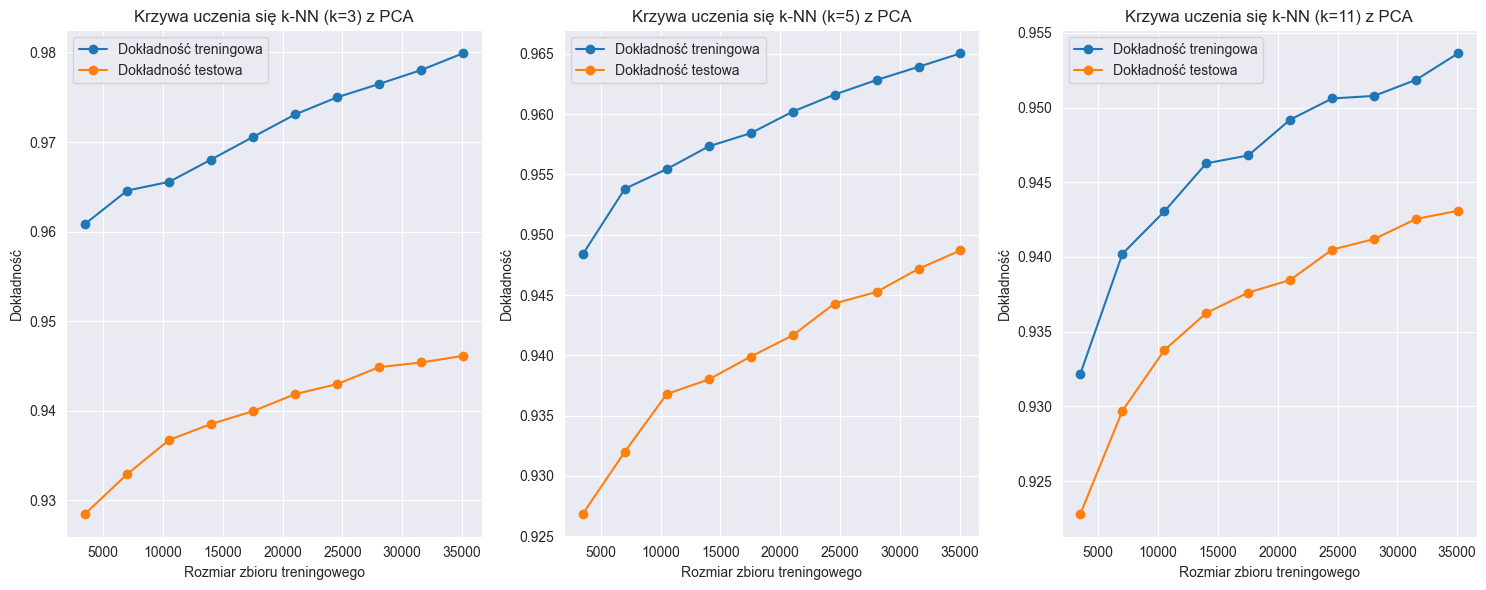

In [29]:
# Значения k для классификаторов k-NN
k_values = [3, 5, 11]
classifiers = [KNeighborsClassifier(n_neighbors=k) for k in k_values]

# Рисование krzywej uczenia się для каждого классификатора
plt.figure(figsize=(15, 6))

for i, clf in enumerate(classifiers, start=1):
    train_sizes, train_scores, test_scores = learning_curve(clf, X_train_pca, y_train, cv=5, train_sizes=np.linspace(0.1, 1.0, 10))
    train_scores_mean = np.mean(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    
    plt.subplot(1, len(classifiers), i)
    plt.plot(train_sizes, train_scores_mean, 'o-', label='Dokładność treningowa')
    plt.plot(train_sizes, test_scores_mean, 'o-', label='Dokładność testowa')
    plt.title(f'Krzywa uczenia się k-NN (k={k_values[i-1]}) z PCA')
    plt.xlabel('Rozmiar zbioru treningowego')
    plt.ylabel('Dokładność')
    plt.legend()
    plt.grid(True)

plt.tight_layout()
plt.show()

588/588 [==============================] - 1s 1ms/step
Accuracy PCA: 94.46485 %
Confusion Matrix PCA, RMSprop as optimizer:
[[ 4400   961]
 [   79 13349]]
------------------------------------------


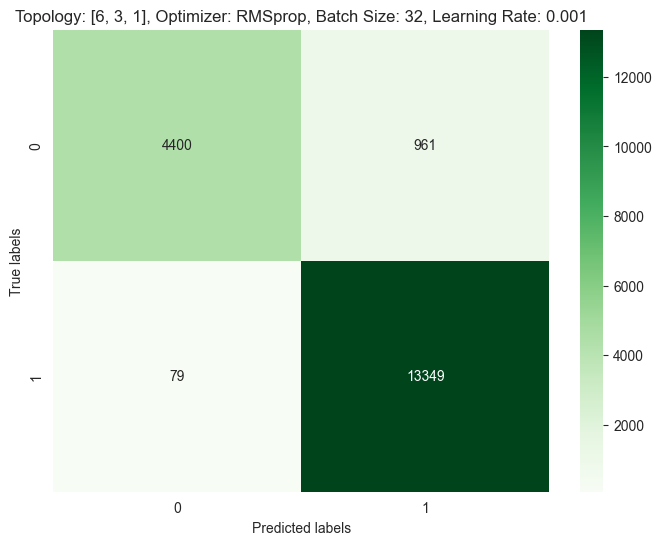

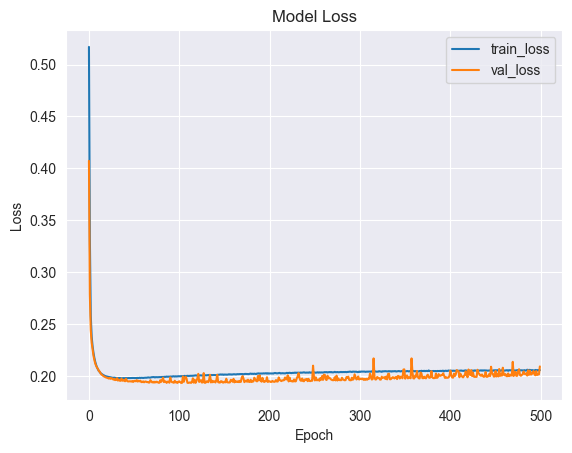

In [30]:
train_set, test_set = train_test_split(df, test_size=0.3, random_state=292752)

train_data = train_set.drop(columns=['Fire Alarm'])
train_labels = train_set['Fire Alarm']

test_data = test_set.drop(columns=['Fire Alarm'])
test_labels = test_set['Fire Alarm']

# Применение PCA
pca = PCA(n_components=0.95)
pca.fit(train_data)
train_data_pca = pca.transform(train_data)
test_data_pca = pca.transform(test_data)

# Масштабирование данных
scaler = StandardScaler()
train_data_scaled = scaler.fit_transform(train_data_pca)
test_data_scaled = scaler.transform(test_data_pca)

# Создание модели нейронной сети
model = Sequential()
model.add(Dense(6, input_dim=train_data_scaled.shape[1], activation='relu'))
model.add(Dense(3, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Компиляция модели с кастомным оптимайзером rmsprop и функцией потерь
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

# Обучение модели на данных с PCA
history = model.fit(train_data_scaled, train_labels, validation_data=(test_data_scaled, test_labels), epochs=500, batch_size=32, verbose=0)

# Оценка модели на тестовом наборе
keras_predictions = (model.predict(test_data_scaled) > 0.5).astype(int)
keras_accuracy = accuracy_score(test_labels, keras_predictions)
keras_confusion = confusion_matrix(test_labels, keras_predictions)

print(f"Accuracy PCA: {keras_accuracy*100:.5f} %")
print("Confusion Matrix PCA, RMSprop as optimizer:")
print(keras_confusion)
print('------------------------------------------')

plt.figure(figsize=(8, 6))
sns.heatmap(keras_confusion, annot=True, cmap='Greens', fmt='g')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title(f"Topology: [6, 3, 1], Optimizer: RMSprop, Batch Size: 32, Learning Rate: 0.001")
plt.show()

# Визуализация кривой ошибок
train_loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(train_loss, label='train_loss')
plt.plot(val_loss, label='val_loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


Epoch 1/500
686/686 [==============================] - 2s 2ms/step - loss: 0.4760 - accuracy: 0.8036 - val_loss: 0.4711 - val_accuracy: 0.8079
Epoch 2/500
686/686 [==============================] - 1s 2ms/step - loss: 0.4722 - accuracy: 0.8056 - val_loss: 0.4705 - val_accuracy: 0.8079
Epoch 3/500
686/686 [==============================] - 1s 2ms/step - loss: 0.4723 - accuracy: 0.8056 - val_loss: 0.4707 - val_accuracy: 0.8079
Epoch 4/500
686/686 [==============================] - 1s 2ms/step - loss: 0.4722 - accuracy: 0.8056 - val_loss: 0.4714 - val_accuracy: 0.8079
Epoch 5/500
686/686 [==============================] - 1s 2ms/step - loss: 0.4723 - accuracy: 0.8056 - val_loss: 0.4712 - val_accuracy: 0.8079
Epoch 6/500
686/686 [==============================] - 1s 2ms/step - loss: 0.4722 - accuracy: 0.8056 - val_loss: 0.4709 - val_accuracy: 0.8079
Epoch 7/500
686/686 [==============================] - 1s 2ms/step - loss: 0.4722 - accuracy: 0.8056 - val_loss: 0.4707 - val_accuracy: 0.8079

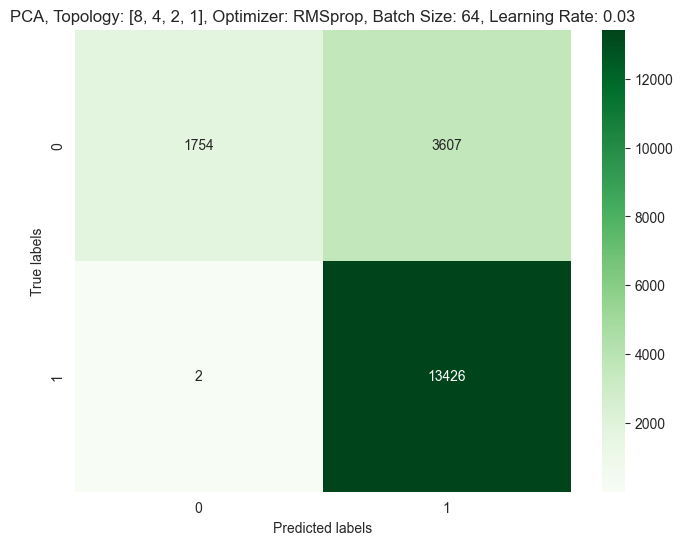

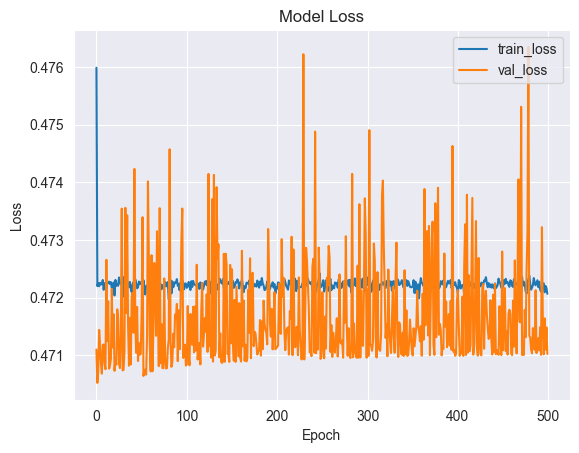

In [31]:
train_set, test_set = train_test_split(df, test_size=0.3, random_state=292752)

train_data = train_set.drop(columns=['Fire Alarm'])
train_labels = train_set['Fire Alarm']

test_data = test_set.drop(columns=['Fire Alarm'])
test_labels = test_set['Fire Alarm']

# Применение PCA
pca = PCA(n_components=0.95)
pca.fit(train_data)
train_data_pca = pca.transform(train_data)
test_data_pca = pca.transform(test_data)

# Масштабирование данных
scaler = StandardScaler()
train_data_scaled = scaler.fit_transform(train_data_pca)
test_data_scaled = scaler.transform(test_data_pca)

# Определение модели
model = Sequential()
model.add(Dense(8, input_dim=train_data_scaled.shape[1], activation='relu'))
model.add(Dense(4, activation='tanh'))
model.add(Dense(2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Компиляция модели
custom_learning_rate = 0.03
custom_rmsprop_optimizer = RMSprop(learning_rate=custom_learning_rate)
model.compile(optimizer=custom_rmsprop_optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Обучение модели
history = model.fit(train_data_scaled, train_labels, validation_data=(test_data_scaled, test_labels),
                    epochs=500, batch_size=64, verbose=1)  # Увеличьте количество эпох при необходимости

# Оценка модели на тестовом наборе
keras_predictions = (model.predict(test_data_scaled) > 0.5).astype(int)
keras_accuracy = accuracy_score(test_labels, keras_predictions)
keras_confusion = confusion_matrix(test_labels, keras_predictions)

print(f"Accuracy PCA: {keras_accuracy*100:.5f} %")
print("Confusion Matrix PCA, RMSprop as optimizer:")
print(keras_confusion)
print('------------------------------------------')


plt.figure(figsize=(8, 6))
sns.heatmap(keras_confusion, annot=True, cmap='Greens', fmt='g')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title(f"PCA, Topology: [8, 4, 2, 1], Optimizer: RMSprop, Batch Size: 64, Learning Rate: 0.03")
plt.show()

# Визуализация кривой ошибок
train_loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(train_loss, label='train_loss')
plt.plot(val_loss, label='val_loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


588/588 [==============================] - 1s 2ms/step
Accuracy PCA: 94.86934 %
Confusion Matrix PCA, Adam as optimizer:
[[ 4400   961]
 [    3 13425]]
------------------------------------------


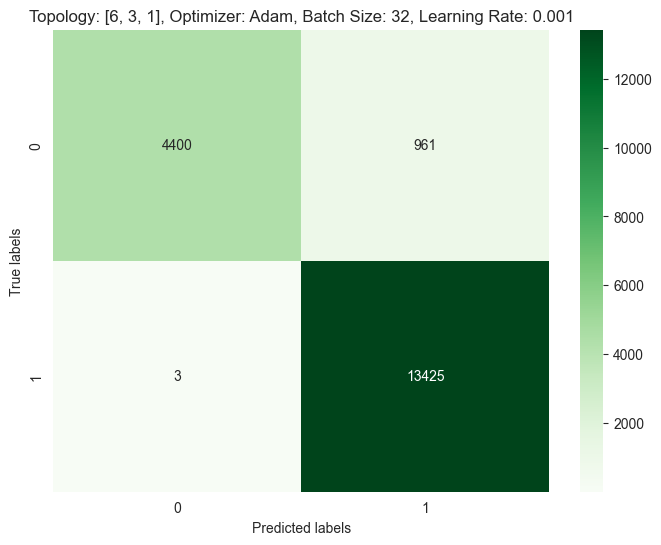

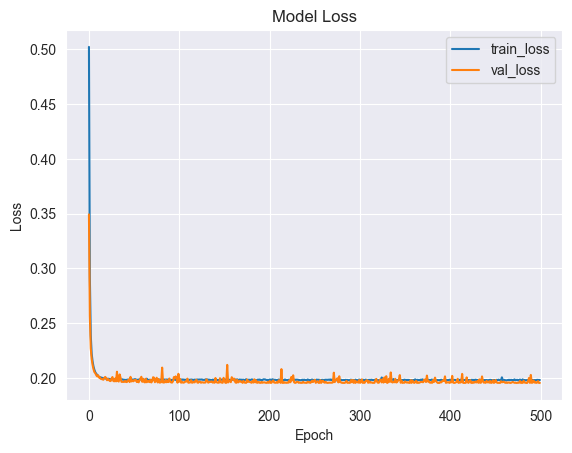

In [12]:
train_set, test_set = train_test_split(df, test_size=0.3, random_state=292752)

train_data = train_set.drop(columns=['Fire Alarm'])
train_labels = train_set['Fire Alarm']

test_data = test_set.drop(columns=['Fire Alarm'])
test_labels = test_set['Fire Alarm']

# Применение PCA
pca = PCA(n_components=0.95)
pca.fit(train_data)
train_data_pca = pca.transform(train_data)
test_data_pca = pca.transform(test_data)

# Масштабирование данных
scaler = StandardScaler()
train_data_scaled = scaler.fit_transform(train_data_pca)
test_data_scaled = scaler.transform(test_data_pca)

# Создание модели нейронной сети
model = Sequential()
model.add(Dense(6, input_dim=train_data_scaled.shape[1], activation='relu'))
model.add(Dense(3, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Компиляция модели с кастомным оптимайзером rmsprop и функцией потерь
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Обучение модели на данных с PCA
history = model.fit(train_data_scaled, train_labels, validation_data=(test_data_scaled, test_labels), epochs=500, batch_size=32, verbose=0)

# Оценка модели на тестовом наборе
keras_predictions = (model.predict(test_data_scaled) > 0.5).astype(int)
keras_accuracy = accuracy_score(test_labels, keras_predictions)
keras_confusion = confusion_matrix(test_labels, keras_predictions)

print(f"Accuracy PCA: {keras_accuracy*100:.5f} %")
print("Confusion Matrix PCA, Adam as optimizer:")
print(keras_confusion)
print('------------------------------------------')

plt.figure(figsize=(8, 6))
sns.heatmap(keras_confusion, annot=True, cmap='Greens', fmt='g')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title(f"Topology: [6, 3, 1], Optimizer: Adam, Batch Size: 32, Learning Rate: 0.001")
plt.show()

# Визуализация кривой ошибок
train_loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(train_loss, label='train_loss')
plt.plot(val_loss, label='val_loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


588/588 [==============================] - 1s 1ms/step
Accuracy PCA: 80.79195 %
Confusion Matrix PCA, Adam as optimizer:
[[ 1754  3607]
 [    2 13426]]
------------------------------------------


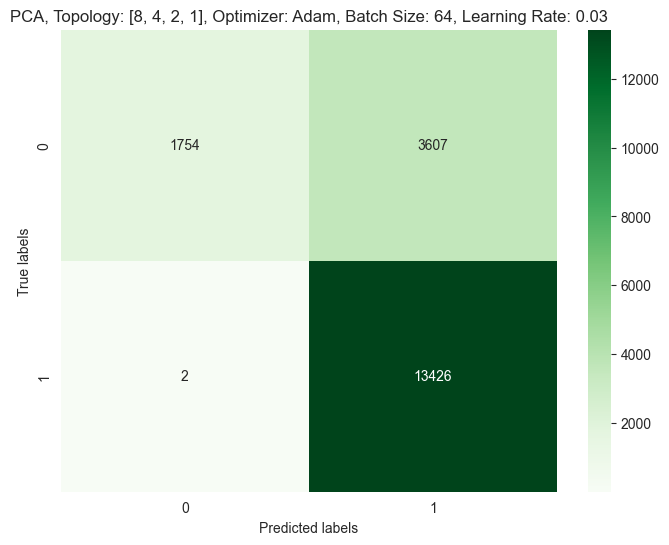

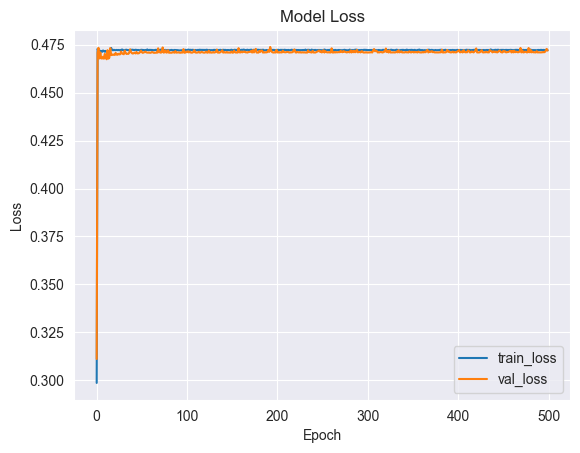

In [11]:
train_set, test_set = train_test_split(df, test_size=0.3, random_state=292752)

train_data = train_set.drop(columns=['Fire Alarm'])
train_labels = train_set['Fire Alarm']

test_data = test_set.drop(columns=['Fire Alarm'])
test_labels = test_set['Fire Alarm']

# Применение PCA
pca = PCA(n_components=0.95)
pca.fit(train_data)
train_data_pca = pca.transform(train_data)
test_data_pca = pca.transform(test_data)

# Масштабирование данных
scaler = StandardScaler()
train_data_scaled = scaler.fit_transform(train_data_pca)
test_data_scaled = scaler.transform(test_data_pca)

custom_learning_rate = 0.03
custom_adam_optimizer = Adam(learning_rate=custom_learning_rate)

model = Sequential()
model.add(Dense(8, input_dim=train_data_scaled.shape[1], activation='relu'))
model.add(Dense(4, activation='tanh'))
model.add(Dense(2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Компиляция модели с кастомным оптимайзером rmsprop и функцией потерь
model.compile(optimizer=custom_adam_optimizer, loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(train_data_scaled, train_labels, validation_data=(test_data_scaled, test_labels), epochs=500, batch_size=64,
                    verbose=0)

# Оценка модели на тестовом наборе
keras_predictions = (model.predict(test_data_scaled) > 0.5).astype(int)
keras_accuracy = accuracy_score(test_labels, keras_predictions)
keras_confusion = confusion_matrix(test_labels, keras_predictions)

print(f"Accuracy PCA: {keras_accuracy*100:.5f} %")
print("Confusion Matrix PCA, Adam as optimizer:")
print(keras_confusion)
print('------------------------------------------')

plt.figure(figsize=(8, 6))
sns.heatmap(keras_confusion, annot=True, cmap='Greens', fmt='g')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title(f"PCA, Topology: [8, 4, 2, 1], Optimizer: Adam, Batch Size: 64, Learning Rate: 0.03")
plt.show()

# Визуализация кривой ошибок
train_loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(train_loss, label='train_loss')
plt.plot(val_loss, label='val_loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()
